In [98]:
import sympy as sy
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 23, 6
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

sy.init_printing()
t, n, om = sy.symbols('t n omega')

# Fourierova transformace v diskrétním čase (DTFT)
## Diskrétní Fourierova transformace (DFT)
  
<br><br><br>

#### KMA/KAT  
##### Honza Půlpán

### Fourierova transformace

- různé varianty v závislosti na typu vzoru a požadovaném typu obrazu
- základní dělení je
    - spojitý vs __diskrétní vzor__
    - spojitý vs diskrétní obraz
- __analýza signálu__ - proces, který rozkládá signál na jeho spektrum (obsažené frekvence) 


<IPython.core.display.Math object>

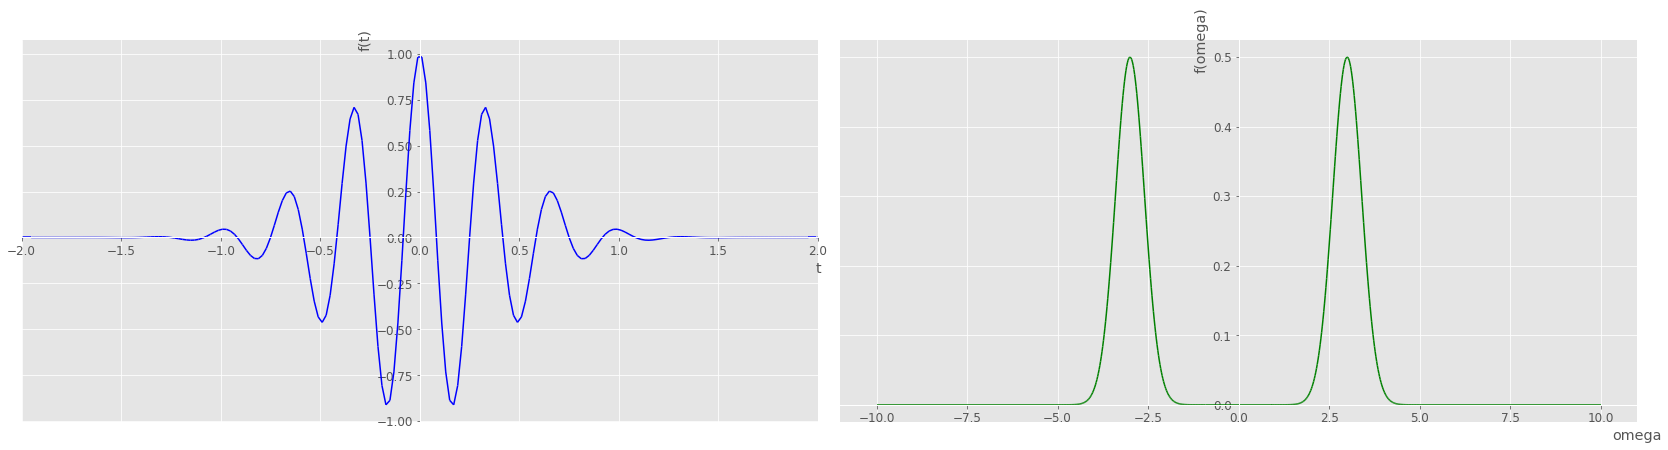

In [102]:
#Příklad 1
f = sy.cos(6*sy.pi*t)*sy.exp(-sy.pi*t**2)
#f = .9*sy.cos(2*sy.pi*.9*t)+.8*sy.cos(sy.pi*t)
F = sy.fourier_transform(f,t,om)
display(Math(rf'\qquad\text{{Vzor: }}f(t) = {sy.latex(f)},\hspace{{4in}}\
        \text{{Obraz: }}F(\omega) = {sy.latex(F)}'))

p1=sy.plot(f, xlim=[-2,2], size=(10,5), line_color='blue', nb_of_points=1000, adaptive=False, show=False)
p2=sy.plot(F, line_color='green', nb_of_points=1000, adaptive=False, show=False)
plotgrid = sy.plotting.PlotGrid(1, 2, p1, p2, size=(18,8))

### Fourierova transformace v diskrétním čase (DTFT)

Definice:
- vzor $x[n]$ je komplexní posloupnost (diskrétní funkce, nekonečný vektor)  $x : \mathbb{Z} \rightarrow \mathbb{C} \;($resp. $ \mathbb{R})$ 

DTFT definujeme jako
$$ \mathcal{F}\big[x[n]\big](i\omega) := X(i\omega) = \sum_{n=-\infty}^{+\infty} x[n] e^{-i\omega n},\, \omega \in \mathbb{R}$$

kde $X: \mathbb{R} \rightarrow \mathbb{C}$ je spojitá funkce.


### Fourierova transformace v diskrétním čase (DTFT)

- DTFT je $2\pi$-periodická - obraz $X(i\omega)$ je spojitá periodická funkce s periodou $2\pi$
- bez újmy na obecnosti můžeme tedy uvažovat jen $\omega \in [-\pi, \pi)$

_Důkaz:_

\begin{align*}
X\left(i(\omega+2\pi)\right) &= \sum_{n=-\infty}^{\infty}x[n] \cdot e^{-i(\omega+2\pi)n}\\
 &= \sum_{n=-\infty}^{\infty}x[n] \cdot e^{-i \omega n} \cdot \underbrace{e^{-i2\pi n}}_{=1}\\
 &= \sum_{n=-\infty}^{\infty}x[n] \cdot e^{-i \omega n} = X(i\omega)
\end{align*}



### Fourierova transformace v diskrétním čase (DTFT)

$$ \mathcal{F}\big[x[n]\big](i\omega) := X(i\omega) = \sum_{n=-\infty}^{+\infty} x[n] e^{-i\omega n},\, \omega \in [-\pi, \pi)$$

- $\omega$ je úhlová frekvence s normalizovanými jednotkami $\frac{rad}{s}$
- $\omega = 2\pi f T -\pi$, $f$ je frekvence v $Hz$ a $T$ je délka kroku mezi vzorky $x[n]$ a platí $f=\frac{\omega+\pi}{2\pi T}$
- obecnou sinusoidu definujeme jako $$ A \sin(\omega n + \varphi_0), $$ kde $A$ je maximální výchylka a $\varphi_0$ je počáteční fáze
- $\left|X(i\omega)\right|$  je funkce maximální výchylky (magnitude spectrum) a měří frekvence "obsažené " v signálu $x[n]$ 
    - čím větší je hodnota $\left|X(i\omega)\right|$, tím více je frekvence daná $\omega$ obsažena ve vzoru $x[n]$
- $\text{Arg}(X(i\omega)) $ je fázové spektrum (phase spectrum), určuje relativní posun frekvence dané $\omega$


### Příklad: DTFT pravostrané exponenciální posloupnosti

$x[n] = a^n u[n], \, a \in \mathbb{C}, |a| < 1\;\;\;$ kde $\;u[n] = \left\{
\begin{array}{ll}
      0 & n < 0 \\
      1 & n\geq 0 \\
\end{array} 
\right.$
$$\mathcal{F}\big[a^n u[n]\big](i\omega) = \sum_{n=-\infty}^{\infty}a^n u[n] e^{-i \omega n} = \sum_{n=0}^{\infty}a^n e^{-i \omega n} = \sum_{n=0}^{\infty}(a e^{-i \omega})^n = \frac{1}{1-ae^{-i\omega}}$$

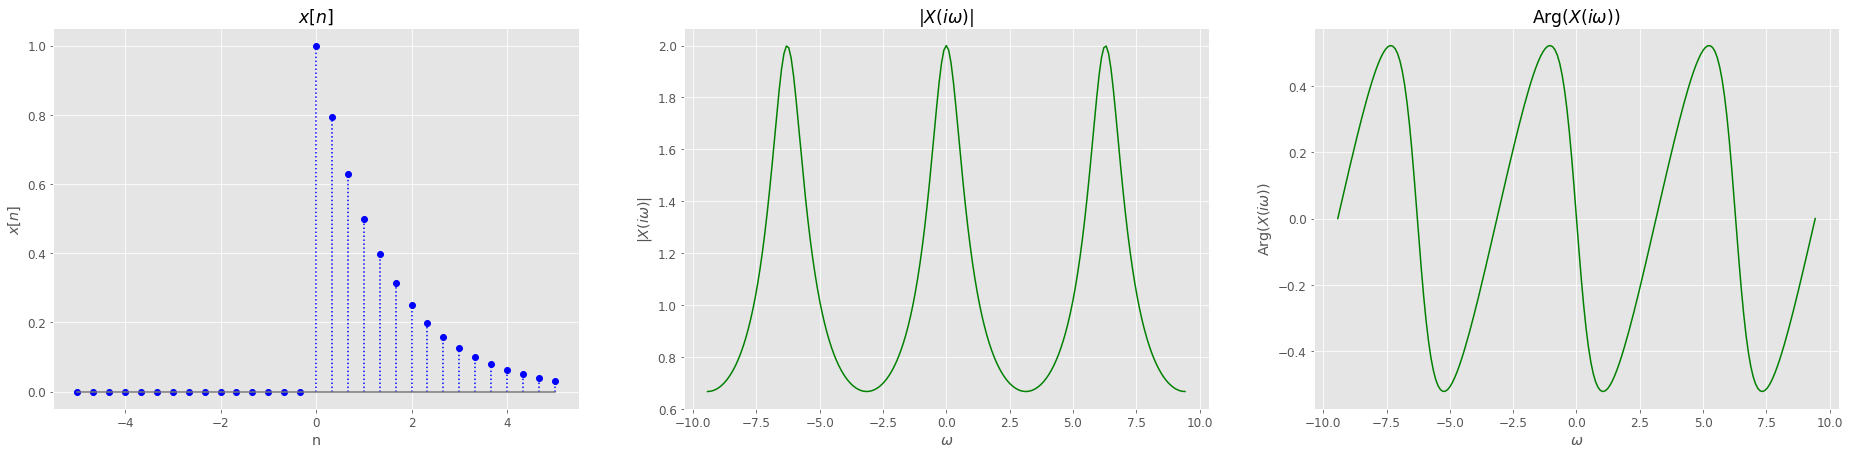

In [123]:
# Přiklad 3: a=1/2
x = np.linspace(-5,5,31); f = .5**x; f[f>1]=0
o = np.linspace(-3*np.pi,3*np.pi,201); F = 1/(1-.5*np.exp(-1j*o))
fig = plt.figure(figsize=(32,7))
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)
ax1.stem(x,f,'o:',linefmt='b:', markerfmt='bo');ax1.set_xlabel('n'); ax1.set_ylabel('$x[n]$'); ax1.set_title('$x[n]$')
ax2.plot(o, np.abs(F), color='green');ax2.set_xlabel('$\omega$');ax2.set_ylabel('$|X(i\omega)|$'); ax2.set_title('$|X(i\omega)|$')
ax3.plot(o, np.angle(F), color='green');ax3.set_xlabel('$\omega$');ax3.set_ylabel('Arg$(X(i\omega))$'); ax3.set_title('Arg$(X(i\omega))$')
plt.show()

### Inverzní Fourierova transformace v diskrétním čase (IDTFT)

- IDTFT rekonstruuje ze spektra (obrazu $X(i\omega)$) původní signál (vzor $x[n]$)

$$\mathcal{F}^{-1}\big[X(i\omega)\big](n) := x[n] := \frac{1}{2\pi}\int_{-\pi}^{\pi}X(i\omega) \cdot e^{i\omega n} \,\text{d}\omega, \; n \in (-\infty, \infty)$$

- protože je obraz periodický, jsou všechny informace obsažené na intervalu $(-\pi,\pi)$ a integrujeme tedy jen přes tento interval
- výsledné $x[n]$ jsou vlastně koeficienty Fourierovy řady, která aproximuje spojitý vzor (signál)

Důkaz případně http://maxim.ece.illinois.edu/teaching/fall08/lec10.pdf

### Vlastnosti DTFT

__Linearita__ 

$$\mathcal{F}\big[ax[n] + by[n]\big](i\omega) = a\mathcal{F}\big[x[n]\big](i\omega) + b\mathcal{F}\big[y[n]\big](i\omega) = aX(i\omega)+bY(i\omega), \; a,b \in \mathbb{C}$$

__Reverzní čas__  
Reverzní čas způsobí reverzní frekvenci.

$$\mathcal{F}\big[x[-n]\big](i\omega) = \mathcal{F}\big[x[n]\big](-i\omega) = X(-i\omega)$$

__Translace vpravo / Posun v čase__  
Posun vzoru v čase vpravo způsobí změnu fáze obrazu.

$$\mathcal{F}\big[x[n-k]\big](i\omega) = e^{-i\omega k} \cdot \mathcal{F}\big[x[n]\big](i\omega) = e^{-i\omega k} \cdot X(i\omega), \; k \in \mathbb{Z}$$

### Vlastnosti DTFT


__Diference ve vzoru__   
DTFT převádí diferenci ve vzoru na násobení komplexním číslem v obrazu.

$$\mathcal{F}\big[x[n]-x[n-1]\big](i\omega) = (1-e^{-i\omega}) \cdot \mathcal{F}\big[x[n]\big](i\omega) = (1-e^{-i\omega}) \cdot X(i\omega)$$

__Derivace v obrazu__  
Derivace v obrazu je převedena na násobení komplexním číslem $\frac{n}{i}$ ve vzoru.
$$\mathcal{F}\big[\frac{n}{i}x[n]\big](i\omega) = \frac{\text{d}}{\text{d}\omega}\mathcal{F}\big[x[n]\big](i\omega) = X'(i\omega)$$


__Parsevalova rovnost__  
"Energie signálu je rovna energii spektra"
$$ \sum_{n=-\infty}^{\infty} x[n]\cdot \overline{y[n]} = \frac{1}{2\pi} \int_{-\pi}^{\pi}X(i\omega)\cdot \overline{Y(i\omega)}\,\text{d}\omega$$ 

speciálně
$$ \lVert x[n] \rVert^2 = \sum_{n=-\infty}^{\infty} |x[n]|^2 = \frac{1}{2\pi} \int_{-\pi}^{\pi}|X(i\omega)|^2\,\text{d}\omega = \lVert X(i\omega)\rVert^2$$

Můžeme tedy říci, že DTFT zachovává normu.

### Vlastnosti DTFT


__Reálný vzor $\Leftrightarrow$ obraz je Hermitovská funkce__

$$ x[n] = \overline{x[n]} \;\Leftrightarrow \; X(i\omega) = \overline{X(-i\omega)}$$

__Reálný a sudý vzor $\Leftrightarrow$ obraz je reálná a sudá funkce__

$$ x[n] = x[-n] \;\Leftrightarrow \; X(i\omega) = X(-i\omega)$$

__Reálný a lichý vzor $\Leftrightarrow$ obraz je čistě imaginární a lichá funkce__

$$ -x[n] = x[-n] \; \Leftrightarrow \; -X(i\omega) = X(-i\omega)$$



### Existence obrazu v DTFT

- vzor obsahuje konečný počet nenulových a konečných členů posloupnosti, řada definující obraz konverguje vždy $\Rightarrow$ obraz vždy existuje

- vzor má nekonečný počet nenulových členů, řada nemusí konvergovat
- postačující podmínku existence můžeme odvodit z konečnosti obrazu

__Tvrzení:__ Postačující podmínka existence obrazu v DTFT:
$$\left| X(i\omega) \right| \leq \sum_{n=-\infty}^{+\infty} \left| x[n] \right| < +\infty$$

_Důkaz:_
\begin{align*}
\left| X(i\omega) \right| &= \left| \sum_{n=-\infty}^{\infty}x[n] \cdot e^{-i \omega n} \right|\\
 &\leq \sum_{n=-\infty}^{\infty} \left|x[n] \cdot e^{-i \omega n} \right|\\
 &= \sum_{n=-\infty}^{\infty} \left|x[n]\right| \cdot \overbrace{\left| e^{-i \omega n} \right|}^{=1} = \sum_{n=-\infty}^{\infty} \left|x[n]\right|\\
\end{align*}



### Jednoznačnost DTFT

__Tvrzení:__ Obraz $X(iw)$ je určen vzorem $x[n]$ jednoznačně.

_Důkaz:_
- důsledek linearity DTFT
- předpokládejme dva různé vzory $x[n], y[n]$ jejichž obrazy $X(i\omega), Y(i\omega)$ se rovnají a definujme $z[n] = x[n]-y[n]$
- pro $z[n]$ z linearity DTFT platí:
$$\mathcal{F}\big[z[n]\big]=\mathcal{F}\big[x[n]-y[n]\big] = Z(i\omega) = \overbrace{X(i\omega)-Y(i\omega)}^{\text{předpokládáme } X(i\omega)=Y(i\omega)}=0 $$
- z definice DTFT lze ukázat $Z(i\omega) = 0 \Leftrightarrow z[n]=0$ a tedy $x[n]=y[n]$ což je spor


### Konvoluce
Konvoluci $z[n]$ dvou posloupností $x,y: \mathbb{Z}\rightarrow\mathbb{C}$ definujeme vztahem

$$z[n] = (x*y)[n] := \sum_{m=-\infty}^{\infty} x[m] \cdot y[n-m] $$

### Vlastnosti DTFT

__Konvoluce ve vzoru__  
Obraz konvoluce vzorů je součin obrazů.
$$\mathcal{F}\big[(x * y)[n]\big](i\omega) = \mathcal{F}\big[x[n]\big](i\omega) \cdot \mathcal{F}\big[y[n]\big](i\omega) = X(i\omega) \cdot Y(i\omega)$$ 

__Konvoluce v obrazu__  
Obraz součinu vzorů je konvolucí jejich obrazů
$$\mathcal{F}\big[x[n] \cdot y[n]\big](i\omega) = \frac{1}{2\pi}(\mathcal{F}\big[x[n]\big] * \mathcal{F}\big[y[n]\big])(i\omega) = \frac{1}{2\pi}\int_{-\pi}^{\pi}X(i\nu) \cdot Y(i(\omega-\nu))\,\text{d}\nu$$ 


### Vlastnosti DTFT - změna měřítka

Definice: __Operátor roztažení $S_l$__  


$$ S_l(x) :=   \left\{
\begin{array}{ll}
      x\left(\frac{n}{l}\right) & n \text{ mod }l = 0,\\
      0 & \text{jinak.} \\
\end{array} 
\right. $$

Operátor roztažení vloží $l-1$ nul mezi každé dva vzorky vzoru $x[n]$  

![alt text](stretch_oper.png "Operátor roztažení")

### Vlastnosti DTFT - změna měřítka

Definice: __Operátor opakování $R_l$__
$$R_l(X) := X(i\omega l), \;\omega \in \left[ -\frac{\pi}{l},\frac{\pi}{l}\right)$$

Aplikuje se na obraz. Operátor mapuje jednotkový kruh $[-\pi,\pi)$ na výseč $\left[ -\frac{\pi}{l},\frac{\pi}{l}\right)$, centrovanou okolo $\omega = 0$ a opakující se $l$-krát.  

![alt text](repeat_oper.png "Operátor opakováni")


### Vlastnosti DTFT - změna měřítka

Tvrzení: __(o změně měřítka)__ 
  
Transformace roztaženého vzoru je rovna násobnému obrazu. Obraz roztaženého vzoru zmenšuje periodu.

$$\mathcal{F}\big[S_l(x[n])\big](i\omega) = R_l\left(\mathcal{F}\big[x[n]\big](i\omega)\right) = X(i\omega l)$$

_Důkaz:_  
\begin{align*}
\mathcal{F}\big[S_l(x[n])\big](i\omega) &= \sum_{n=-\infty}^{\infty}S_l(x[n]) \cdot e^{-i\omega n}\\
 &=  \sum_{n=-\infty}^{\infty}x[\frac{n}{l}] \cdot e^{-i\omega n} \;\;\;\;\;\; \big/ \text{subst. }m := \frac{n}{l}\\
 &=  \sum_{m=-\infty}^{\infty}x[m] \cdot e^{-i\omega ml} \\
 &=  X(i\omega l)
\end{align*}  

Ve světě zpracování signálu se pomocí změny měřítka definuje ideální interpolace omezující pásmo. Vstupní signál se upraví pomocí operátoru roztažení a jeho obraz pak pomocí filtru ořeže na $|\omega|<\pi/l$.

### Slovník DTFT zajímavých funkcí



|Funkce |Vzor $$x[n]$$ | Obraz $$X(i\omega)$$|
|:-|:-|:-|
|Diracova delta funkce| $\delta[n]=\left\{
\begin{array}{ll}
      +\infty & n = 0 \\
      0 & n \neq 0 \\
\end{array} 
\right.\;\;$|$$1$$|
|Posunutá Diracova delta funkce| $$\delta[n-l]$$ | $$e^{-il\omega}$$|
|Jednotkový skok| $u[n] =\left\{
\begin{array}{ll}
      0 & n < 0 \\
      1 & n\geq 0 \\
\end{array} 
\right.\;\;$ | $$\frac{1}{1-e^{-i\omega}}+\pi \sum_{k=-\infty}^{+\infty}\delta(\omega-2\pi k)$$ |
| | $$a^n u[n],\, |a|<1$$| $$\frac{1}{1-ae^{-i\omega}}$$|
| | $$e^{-ian},\, a\in\mathbb{R}$$ | $$2\pi \sum_{k=-\infty}^{+\infty}\delta(\omega+a-2\pi k) $$ |


# Diskrétní Fourierova transformace (DFT)

### Diskrétní Fourierova transformace (DFT)
 
- vzor $\boldsymbol{x} \in \mathbb{C}^N$ je komplexní vektor reprezentující signál na nějakém časovém úseku $D(N) = \{0,1,\dots,N-1\}.$  
- oproti DTFT diskretizujeme i úhlovou frekvenci $\omega = \frac{2\pi k}{N}, \; k \in D(N)$   
- DFT je definována jako

$$ \mathcal{F}\big[\boldsymbol{x}\big]\left(k\right) := X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{i2\pi}{N} kn},\, k \in D(N)$$

- obrazem je komplexní vektor $\boldsymbol{X} \in \mathbb{C}^N$ reprezentující spektrální analýzu signálu stejným způsobem jako v případě DTFT.
 

### Inverzní diskrétní Fourierova transformace (IDFT)

- obraz $\boldsymbol{X} \in \mathbb{C}^N$ je vektor reprezentující spektrum signálu
- IDFT je definována
$$ \mathcal{F}^{-1}\big[\boldsymbol{X}\big](n) = x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_n \cdot e^{\frac{i2\pi}{N} kn},\, n \in D(N)$$

- vzor je $\boldsymbol{x} \in \mathbb{C}^N$ vektor reprezentující signál na časovém úseku $D(N) = \{0,1,\dots,N-1\}.$ 

### Fast Fourier Transform (FFT)

- algoritmus implementující DFT
- DFT provede transformaci v $O(N^2)$ operacích
- FFT provede transformaci v $O(N \text{ log } N)$ operacích
- pro FFT v počítačové aritmetice je horní odhad pro relativní chybu $O(\epsilon \text{ log } N)$, kde $\epsilon$ je floating-point precision použité počítačové aritmetiky
- FFT je dnes prakticky synonymum pro DFT
- Nature zahrnul FFT ve zprávě na webu do "10 počítačových kódů, které změnili vědu"  
https://www.nature.com/articles/d41586-021-00075-2

<IPython.core.display.Math object>

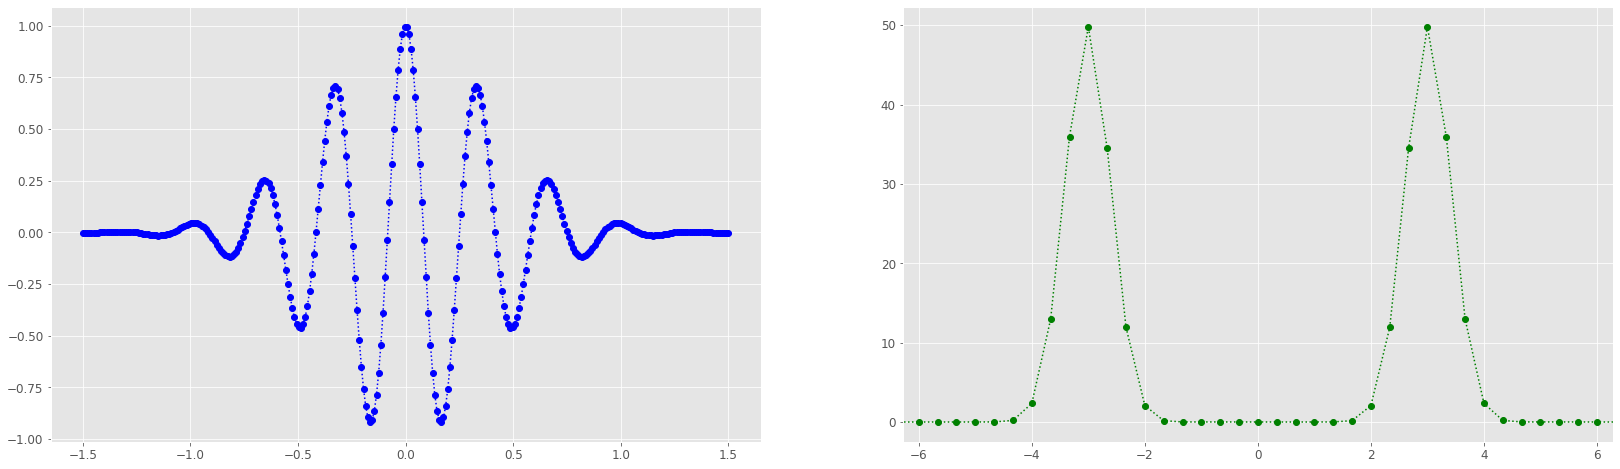

In [119]:
# Příklad 2 - DFT/FFT
N = 300       # počet vzorků
T = 1 / 100.0 # vzdálenost mezi vzorky
t = np.linspace(-N*T/2., N*T/2., N)
f = np.cos(6*np.pi*t)*np.exp(-np.pi*t**2)
ff = np.fft.fft(f)
xf = np.fft.fftfreq(N,T)
display(Math(rf'\qquad\text{{Vzor: }}x_n = \cos(6\pi n)\cdot e^{{-\pi n^2}}, N=300 ,\hspace{{5in}}\
        \text{{Obraz: }}X((i2\pi k)/N)'))

fig = plt.figure(figsize=(28,8))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
xfsi = xf.argsort();xfs = xf[xfsi[::-1]];ffs = ff[xfsi[::-1]]
ax1.plot(t,f,'o:', color='blue')
ax2.plot(xfs, np.abs(ffs), 'o:', color='green')
ax2.set_xlim(-2*np.pi, 2*np.pi);


<IPython.core.display.Math object>

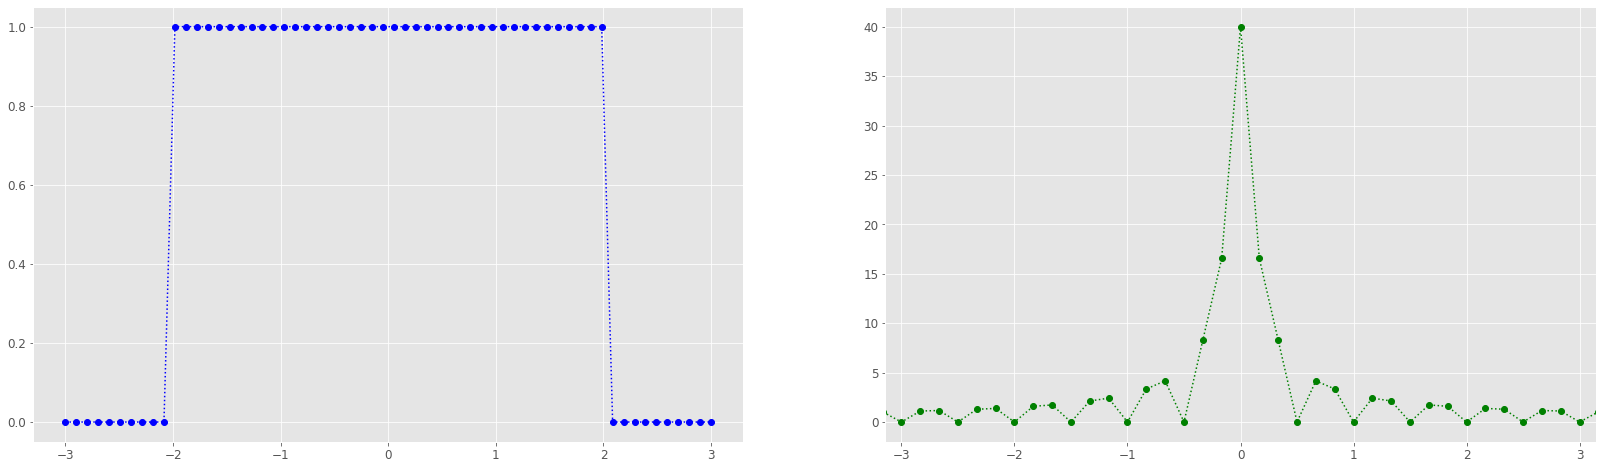

In [120]:
# Příklad 3 - DFT/FFT
N = 60       # počet vzorků
T = 1 / 10.0 # vzdálenost mezi vzorky
t = np.linspace(-N*T/2., N*T/2., N)
f = np.zeros(N)
f[np.argwhere((t>-2) & (t < 2))] = 1
ff = np.fft.fft(f,N)
xf = np.fft.fftfreq(N,T)
display(Math(rf'\qquad\text{{Vzor: }}x_n \hspace{{8in}}\
        \text{{Obraz: }}X((i2\pi k)/N)'))

fig = plt.figure(figsize=(28,8))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
xfsi = xf.argsort();xfs = xf[xfsi[::-1]];ffs = ff[xfsi[::-1]]
ax1.plot(t,f,'o:', color='blue')
ax2.plot(xfs, np.abs(ffs), 'o:', color='green');
ax2.set_xlim(-np.pi, np.pi);

### Tabulka Fourierových transformací

| Čas |||
|:-|:-|:-|
|konečný|nekonečný||
|__DFT__ $$X_k\left(\frac{i2\pi k}{N}\right) = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac{i2\pi}{N} kn}, \;\;k \in \{0,1,\dots, N-1\}\;\;$$ |__DTFT__$$ X(i\omega) := \sum_{n=-\infty}^{+\infty} x[n] e^{-i\omega n},\;\; \omega \in (-\pi,\pi)$$|diskrétní n|
|__FS__ (Fourierovy řady)$$X(k) :=  \int_{0}^{P} x(t) e^{-i\omega_k t} \text{d}t,\;\; k \in \mathbb{Z}$$|__FT__ $$F(i\omega) :=  \int_{-\infty}^{+\infty} f(t) e^{-i\omega t} \text{d}t,\;\; \omega \in \mathbb{R}$$|spojitý t|
|diskrétní frekvence|spojitá frekvence|

# Děkuji

#### Literatura

[1] Smith, J.O. Spectral Audio Signal Processing, http://ccrma.stanford.edu/~jos/sasp/, online book, 2011 edition  

[2] J. O. Smith, Mathematics of the Discrete Fourier Transform (DFT), with Audio Applications, Second Edition, https://ccrma.stanford.edu/~jos/mdft/, Apr. 2007, online book.  

[3] Wikipedia contributors. (2021, January 16). Discrete-time Fourier transform. In Wikipedia, The Free Encyclopedia. Retrieved 13:42, January 19, 2021, from https://en.wikipedia.org/w/index.php?title=Discrete-time_Fourier_transform&oldid=1000755020